In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## task 1

### a)

In [8]:
def linear_congruential_generator(N, M, a, b):
    return (((a * N) + b) % M)

In [98]:
def test(u):
    
    l = len(u)
    
    # histogram
    plt.figure(1)
    plt.hist(u, bins=int(np.sqrt(l)), density=True)

    # 2d scatter plot
    plt.figure(2)
    plt.scatter(u[:-1], u[1:], marker='.', s = 2)

    plt.ylabel('U(i)')
    plt.xlabel('U(i+1)')

    # 3d scatter plot
    fig = plt.figure(3)
    ax = fig.add_subplot(111, projection='3d')
    x = u[:-2]
    y = u[1:-1]
    z = u[2:]

    # Scatter plot
    ax.scatter(x, y, z, c='b', marker='.', s=2)

    ax.view_init(elev=30, azim=55)
    ax.set_xlabel('U(i)')
    ax.set_ylabel('U(i+1)')
    ax.set_zlabel('U(i+2)')

    plt.show()

mean = 0.5010869455875628
std = 0.2876078755777412


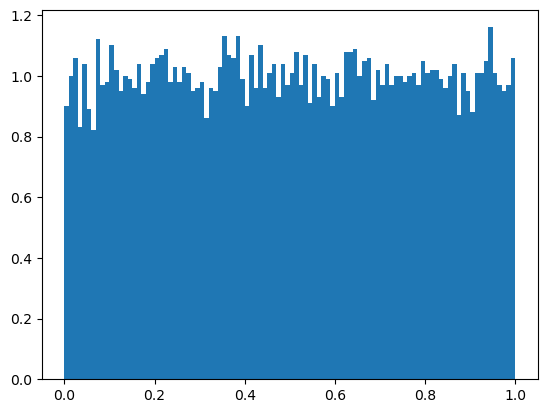

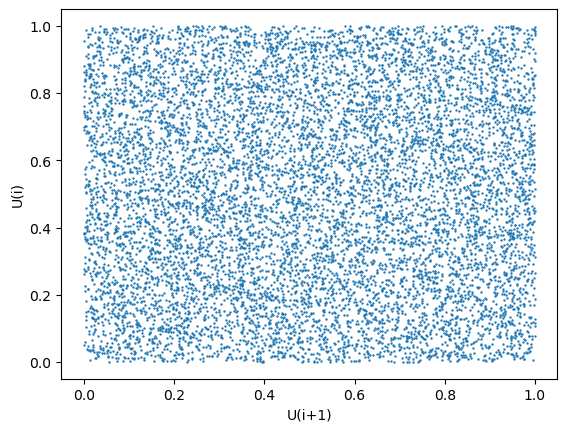

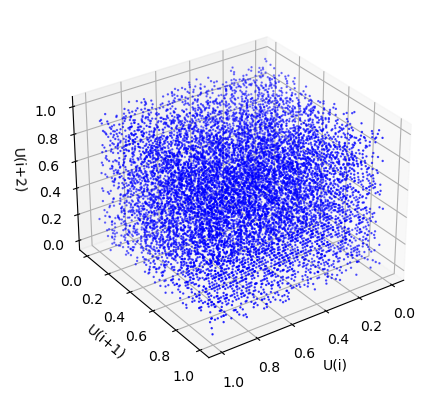

In [121]:
# useful parameters
M = 244944
a = 1597
b = 51749

# seed
N_0 = 10

# lenght of number that you want to generate
l = 10000

r_arr = np.zeros(l)
r_arr[0] = N_0

for i in range(1, l):
    r_arr[i] = linear_congruential_generator(r_arr[i-1], M, a, b)
    
u_arr = r_arr / M

print(f"mean = {np.mean(u_arr)}")
print(f"std = {np.std(u_arr)}")

test(u_arr)

### Example

mean = 0.483857421875
std = 0.293394661275844


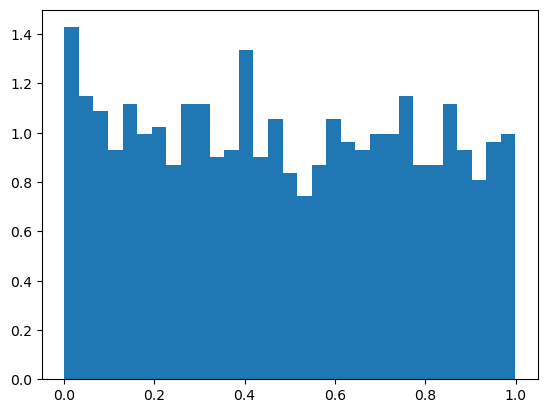

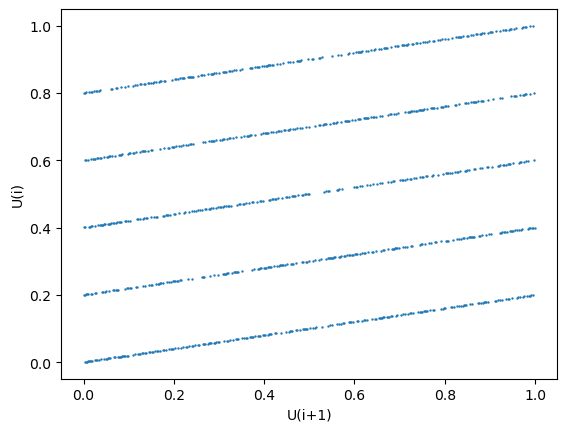

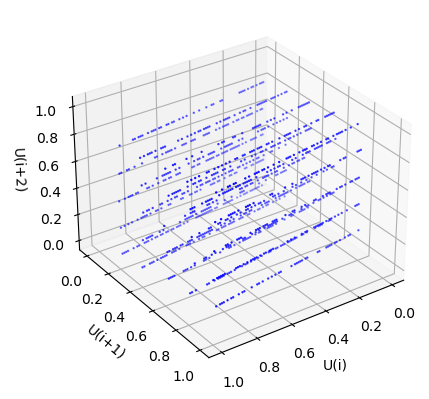

In [106]:
a = 1229
b = 1
M = 2048
# seed
N_0 = 10

# lenght of number that you want to generate
l = 1000


r_arr = np.zeros(l)
r_arr[0] = N_0

for i in range(1, l):
    r_arr[i] = linear_congruential_generator(r_arr[i-1], M, a, b)
    
u_arr = r_arr / M

print(f"mean = {np.mean(u_arr)}")
print(f"std = {np.std(u_arr)}")

test(u_arr)

### RANDU

mean = 0.4985716585189104
std = 0.28883833368304856


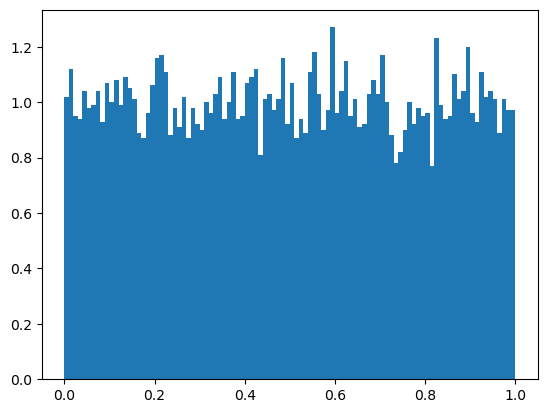

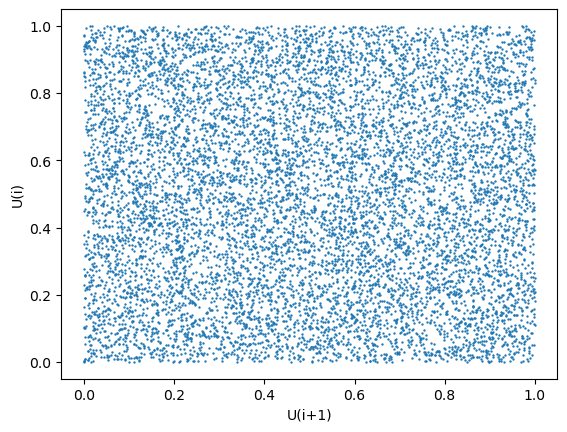

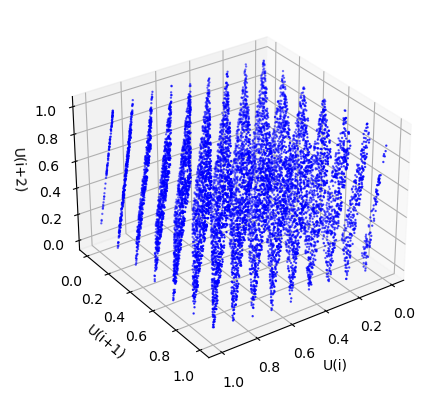

In [105]:
a = (2 ** 16) + 3
b = 0
M = 2 ** 31
# seed
N_0 = 10

# lenght of number that you want to generate
l = 10000

r_arr = np.zeros(l)
r_arr[0] = N_0

for i in range(1, l):
    r_arr[i] = linear_congruential_generator(r_arr[i-1], M, a, b)
    
u_arr = r_arr / M

print(f"mean = {np.mean(u_arr)}")
print(f"std = {np.std(u_arr)}")

test(u_arr)

## Task 2

In [157]:
# useful parameters
M = 244944
a = 1597
b = 51749

# seed
N_0 = 10

# lenght of number that you want to generate
l = 10000

r_arr = np.zeros(l)
r_arr[0] = N_0

for i in range(1, l):
    r_arr[i] = linear_congruential_generator(r_arr[i-1], M, a, b)
    
u_arr = r_arr / M

u_prime = (u_arr * np.pi) - np.pi/2

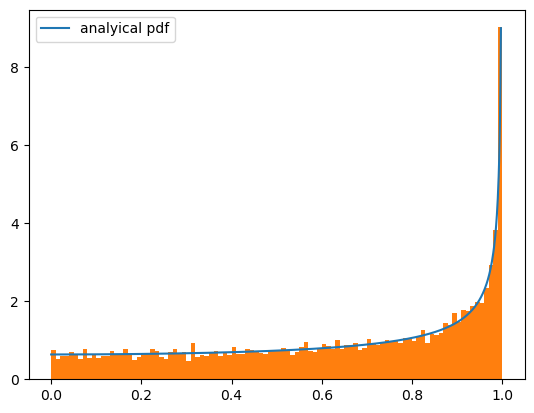

In [164]:
# analyical pdf from COMP0045_slides pag. 86
y = np.linspace(0, 0.9975, 1000)
pdf_y = 2 / (np.pi * np.sqrt(1 - y**2))


plt.figure(1)
plt.plot(y, pdf_y, label='analyical pdf')
plt.hist(np.cos(u_prime), bins=int(np.sqrt(l)), density=True)

plt.legend()
plt.show()

## Task 3 - Fibonacci generator

In [91]:
# inizialization phase
a = 1366
b = 150889
M = 714025
# seed
N_0 = 10

r_arr = np.zeros(18)
r_arr[0] = N_0

for i in range(1, 18):
    r_arr[i] = linear_congruential_generator(r_arr[i-1], M, a, b)
    
u_arr = r_arr / M

l = 10000
f_arr = np.zeros(l)
f_arr[:17] = u_arr[1:]

for i in range(17, l):
    if f_arr[i-17] - f_arr[i-5] > 0:
        f_arr[i] = f_arr[i-17] - f_arr[i-5]
    else:
        f_arr[i] = f_arr[i-17] - f_arr[i-5] + 1

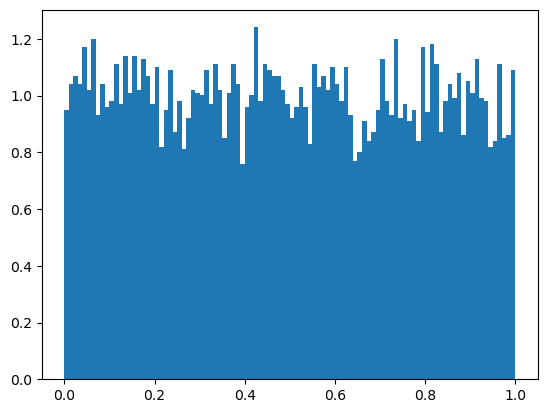

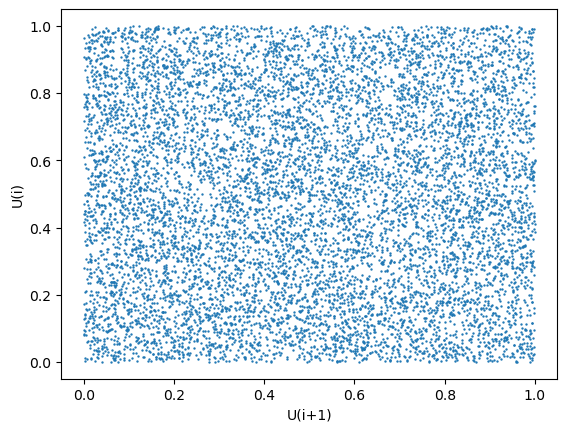

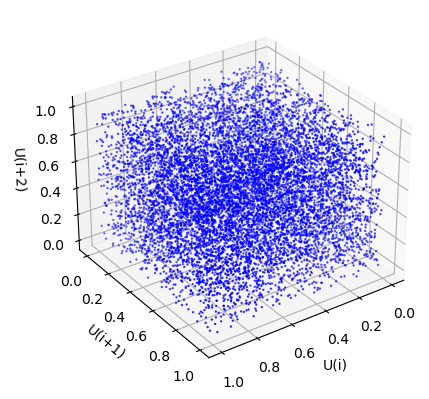

In [104]:
test(f_arr)

## Task 4

In [152]:
# useful parameters
M = 244944
a = 1597
b = 51749

# lenght of number that you want to generate
l = 100000

# first uniform variable
r_arr = np.zeros(l)
# 1st seed
r_arr[0] = 10

for i in range(1, l):
    r_arr[i] = linear_congruential_generator(r_arr[i-1], M, a, b)
    
u_1 = r_arr / M

# second uniform variable
r_arr = np.zeros(l)
# 2nd seed
r_arr[0] = 15

for i in range(1, l):
    r_arr[i] = linear_congruential_generator(r_arr[i-1], M, a, b)
    
u_2 = r_arr / M

# Box-Muller method
y_1 = np.sqrt((-2) * np.log(u_1)) * np.cos(2 * np.pi * u_2)
y_2 = np.sqrt((-2) * np.log(u_1)) * np.sin(2 * np.pi * u_2)

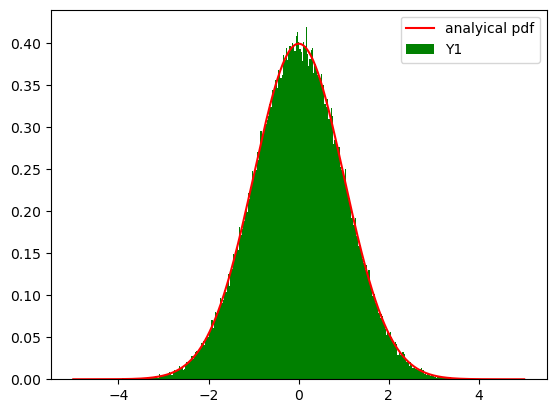

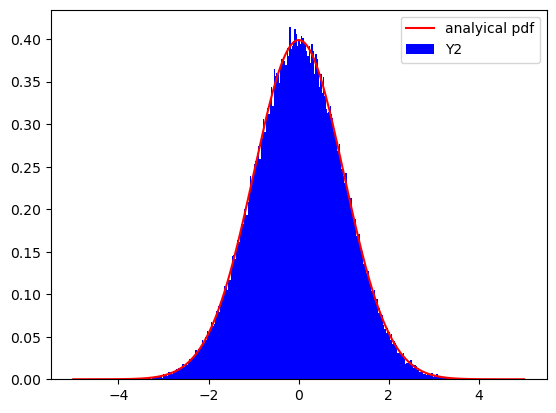

In [154]:
# gaussian density function
yy = np.linspace(-5, 5, 1000)
pdf_yy = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5*yy**2)

plt.figure(1)
plt.plot(yy, pdf_yy, label='analyical pdf', color='r')
plt.hist(y_1, bins=int(np.sqrt(l)), density=True, label='Y1', color='g')
plt.legend()

plt.figure(2)
plt.plot(yy, pdf_yy, label='analyical pdf', color='r')
plt.hist(y_2, bins=int(np.sqrt(l)), density=True, label='Y2', color='b')

plt.legend()
plt.show()